<center><h1>Music Genre Classification using Deep Learning</h1></center>

## Project Description

This project aims to classify music genres using deep learning techniques. The GTZAN dataset from Kaggle is used for training and evaluation. The dataset consists of audio files from various music genres, including blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, and rock.

The main objective of this project is to develop a deep learning model that can accurately classify music genres based on their audio features. The model will be trained on a subset of the GTZAN dataset, and its performance will be evaluated on a separate test set.

## Dataset

The GTZAN dataset contains 10 music genres, with each genre having approximately 100 audio samples. Each audio sample is 30 seconds long and has a sample rate of 22,050 Hz. The audio files are in WAV format.

## Methodology

The project will follow the following steps:

1. Data Preprocessing: The audio files will be preprocessed to extract relevant features, such as Mel-frequency cepstral coefficients (MFCCs), spectral contrast, and tonal centroid. These features will be used as inputs to the deep learning model.

2. Model Development: A deep learning model will be developed using convolutional neural networks (CNNs) or recurrent neural networks (RNNs) to classify music genres. The model architecture will be designed to effectively capture the temporal and spectral characteristics of the audio signals.

3. Model Training: The model will be trained on a subset of the GTZAN dataset using an appropriate loss function and optimization algorithm. The training process will involve iterating over the training data multiple times (epochs) to minimize the loss and improve the model's performance.

4. Model Evaluation: The trained model will be evaluated on a separate test set to assess its performance in classifying music genres. The evaluation metrics, such as accuracy, precision, recall, and F1 score, will be used to measure the model's effectiveness.

5. Model Deployment: Once the model is trained and evaluated, it can be deployed to classify music genres in real-world scenarios. The model can be integrated into music streaming platforms or used as a standalone application.

## Conclusion

By successfully developing a deep learning model for music genre classification, this project aims to contribute to the field of music analysis and provide a valuable tool for music recommendation systems, music information retrieval, and other related applications.

## Download Dataset

Dwonload the dataset using the kaggle API and unzip the downloaded file. We have to remove the jazz.0054.wav file as it is corrupted.

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip gtzan-dataset-music-genre-classification.zip
!rm gtzan-dataset-music-genre-classification.zip /content/Data/genres_original/jazz/jazz.00054.wav

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.20G/1.21G [00:19<00:00, 70.8MB/s]
100% 1.21G/1.21G [00:19<00:00, 68.2MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_or

## Install Librosa

To work with audio data we have to download library named `librosa`

In [ ]:
!pip install librosa

## Import Libraries

In [ ]:
import os
import math
import json
import librosa
import numpy as np
import pandas as pd

# Data Preprocessing

To preprocess the data for music genre classification, we will perform the following steps:

1. Load the audio files: Read the audio files from the dataset directory.

2. Split the audio files into segments: Divide each audio file into multiple segments of equal duration. This helps in capturing different variations within each audio sample.

3. Extract audio features: Extract relevant features from each segment of the audio files. Commonly used features for music genre classification include Mel-frequency cepstral coefficients (MFCCs), spectral contrast, and tonal centroid.

4. Store the features and labels: Save the extracted features along with their corresponding genre labels in a suitable data structure, such as a JSON file.

By performing these preprocessing steps, we can convert the raw audio data into a format that can be used as input to a deep learning model for music genre classification.

In [ ]:
DATASET_PATH = "/content/Data/genres_original"
JSON_PATH = "data.json"

SAMPLE_RATE = 22050
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """
    Save the MFCC (Mel-frequency cepstral coefficients) features of audio files in a dataset to a JSON file.

    Parameters:
    - dataset_path (str): The path to the dataset directory.
    - json_path (str): The path to the JSON file where the MFCC features will be saved.
    - n_mfcc (int): The number of MFCC coefficients to extract (default: 13).
    - n_fft (int): The number of samples per frame for the Fourier transform (default: 2048).
    - hop_length (int): The number of samples between successive frames (default: 512).
    - num_segments (int): The number of segments to divide each audio file into (default: 5).

    Returns:
    None
    """

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    number_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    # Loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # Ensure that we're not at the root level
        if dirpath is not dataset_path:

            # Save the semantic label
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            # Process files for a specific genre
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path)

                # Process segments extracting mfcc and storing data
                for s in range(num_segments):
                    start_sample = num_segments * s
                    finish_sample = start_sample + num_samples_per_segment

                    mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                                                 sr=sr,
                                                 n_mfcc=n_mfcc,
                                                 n_fft=n_fft,
                                                 hop_length=hop_length
                                                )
                    mfcc = mfcc.T

                    # Store mfcc for segment if it has the expected length
                    if len(mfcc) == number_of_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(f"{file_path}, segment: {s+1}")

    # Dump all of the preprocessed data into a JSON file for later use
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/Data/genres_original/blues/blues.00070.wav, segment: 1
/content/Data/genres_original/blues/blues.00070.wav, segment: 2
/content/Data/genres_original/blues/blues.00070.wav, segment: 3
/content/Data/genres_original/blues/blues.00070.wav, segment: 4
/content/Data/genres_original/blues/blues.00070.wav, segment: 5
/content/Data/genres_original/blues/blues.00070.wav, segment: 6
/content/Data/genres_original/blues/blues.00070.wav, segment: 7
/content/Data/genres_original/blues/blues.00070.wav, segment: 8
/content/Data/genres_original/blues/blues.00070.wav, segment: 9
/content/Data/genres_original/blues/blues.00070.wav, segment: 10
/content/Data/genres_original/blues/blues.00046.wav, segment: 1
/content/Data/genres_original/blues/blues.00046.wav, segment: 2
/content/Data/genres_original/blues/blues.00046.wav, segment: 3
/content/Data/genres_original/blues/blues.00046.wav, segment: 4
/content/Data/genres_original/blues/blues.00046.wav,

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout,
import matplotlib.pyplot as plt

DATA_PATH = "data.json"

## Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNNs) are a type of deep learning model commonly used for image and signal processing tasks. They are particularly effective in tasks that involve extracting features from input data, such as image classification, object detection, and speech recognition.

CNNs are composed of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply filters to the input data, extracting local patterns and features. The pooling layers downsample the feature maps, reducing the spatial dimensions. The fully connected layers perform the final classification or regression based on the extracted features.

CNNs are well-suited for tasks like music genre classification, where the input data has a spatial structure. In the case of music genre classification, the input data can be represented as spectrograms or other time-frequency representations of audio signals.

## Data Preparation for CNN

To prepare the data for training a CNN model for music genre classification, the following steps are typically performed:

1. Load the audio data: Read the audio files from the dataset directory.

2. Preprocess the audio data: Convert the audio signals into suitable representations for CNN input. This can involve transforming the audio signals into spectrograms, mel-spectrograms, or other time-frequency representations.

3. Split the data into training and testing sets: Divide the preprocessed data into training and testing sets. The training set is used to train the CNN model, while the testing set is used to evaluate its performance.

4. Normalize the data: Normalize the input data to have zero mean and unit variance. This helps in stabilizing the training process and improving the model's generalization ability.

5. Encode the labels: Convert the categorical labels (e.g., genre names) into numerical representations. This can be done using one-hot encoding or label encoding.

6. Augment the data (optional): If the dataset is small, data augmentation techniques can be applied to artificially increase the size of the training set. This can involve applying random transformations to the audio data, such as time stretching, pitch shifting, or adding background noise.

7. Prepare the data generators: Create data generators that can efficiently load and preprocess the data in batches during the training process. This helps in handling large datasets that may not fit entirely in memory.

By following these steps, the audio data can be prepared and fed into a CNN model for training and evaluation in the music genre classification task.

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential([

      Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
      BatchNormalization(),

      Conv2D(32, (3, 3), activation='relu'),
      MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
      BatchNormalization(),

      Conv2D(32, (2, 2), activation='relu'),
      MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
      BatchNormalization(),

      Flatten(),
      Dense(64, activation='relu'),
      Dropout(0.3),

      Dense(10, activation='softmax')
      ])

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [ ]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                        

In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
188/188 [==============================] - 10s 16ms/step - loss: 2.3006 - accuracy: 0.2570 - val_loss: 1.7628 - val_accuracy: 0.4009
Epoch 2/30
188/188 [==============================] - 1s 7ms/step - loss: 1.6479 - accuracy: 0.4252 - val_loss: 1.3236 - val_accuracy: 0.5730
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 1.3783 - accuracy: 0.5168 - val_loss: 1.0958 - val_accuracy: 0.6771
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 1.1886 - accuracy: 0.5927 - val_loss: 0.9379 - val_accuracy: 0.7231
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 1.0702 - accuracy: 0.6297 - val_loss: 0.8263 - val_accuracy: 0.7785
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.9192 - accuracy: 0.6978 - val_loss: 0.7028 - val_accuracy: 0.8346
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.8202 - accuracy: 0.7362 - val_loss: 0.6178 - val_accuracy: 0.8499
Epoc

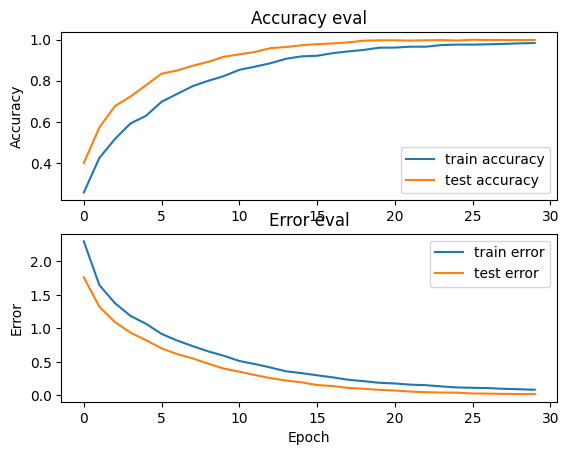

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

79/79 - 0s - loss: 0.0190 - accuracy: 0.9992 - 325ms/epoch - 4ms/step

Test accuracy: 0.9991993308067322
1/1 [==============================] - 0s 240ms/step
Target: 8, Predicted label: [8]


## LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture that is widely used for sequence modeling tasks. It is particularly effective in handling long-term dependencies in sequential data, making it suitable for tasks such as natural language processing, speech recognition, and time series analysis.

LSTM networks are designed to overcome the vanishing gradient problem that occurs in traditional RNNs. The vanishing gradient problem refers to the difficulty of capturing long-term dependencies when training RNNs, as the gradients tend to diminish exponentially over time. LSTM networks address this issue by introducing a memory cell and three gating mechanisms: the input gate, the forget gate, and the output gate. These gates control the flow of information within the network, allowing it to selectively remember or forget information over long sequences.

The memory cell in an LSTM network acts as a storage unit that can retain information over long periods of time. The input gate determines how much new information should be stored in the memory cell, while the forget gate controls how much old information should be discarded. The output gate regulates the flow of information from the memory cell to the next time step.

By incorporating these gating mechanisms, LSTM networks are able to capture long-term dependencies in sequential data, making them well-suited for tasks that involve analyzing and predicting patterns over time.

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [ ]:
# get train, validation, test splits
X_train, X_validation, X_test_lstm, y_train, y_validation, y_test_lstm = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model_lstm = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_lstm.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 57802 (225.79 KB)
Trainable params: 57802 (225.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

history = model_lstm.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50, callbacks=[early_stopping])


Epoch 1/50
188/188 [==============================] - 10s 19ms/step - loss: 2.2208 - accuracy: 0.1769 - val_loss: 2.0787 - val_accuracy: 0.3115
Epoch 2/50
188/188 [==============================] - 3s 15ms/step - loss: 1.9482 - accuracy: 0.3329 - val_loss: 1.7784 - val_accuracy: 0.4249
Epoch 3/50
188/188 [==============================] - 3s 15ms/step - loss: 1.6973 - accuracy: 0.4235 - val_loss: 1.5430 - val_accuracy: 0.4790
Epoch 4/50
188/188 [==============================] - 4s 19ms/step - loss: 1.4968 - accuracy: 0.4904 - val_loss: 1.3740 - val_accuracy: 0.5610
Epoch 5/50
188/188 [==============================] - 4s 22ms/step - loss: 1.3436 - accuracy: 0.5525 - val_loss: 1.2478 - val_accuracy: 0.6057
Epoch 6/50
188/188 [==============================] - 3s 14ms/step - loss: 1.2115 - accuracy: 0.6089 - val_loss: 1.1273 - val_accuracy: 0.6624
Epoch 7/50
188/188 [==============================] - 3s 15ms/step - loss: 1.0816 - accuracy: 0.6576 - val_loss: 1.0215 - val_accuracy: 0.682

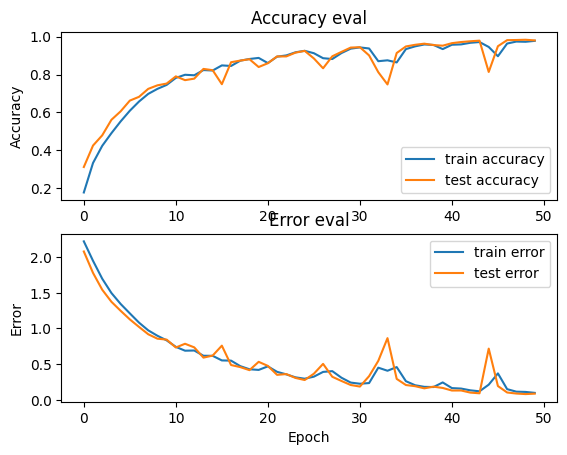

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
# evaluate model on test set
test_loss, test_acc = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.0940 - accuracy: 0.9792 - 537ms/epoch - 7ms/step

Test accuracy: 0.9791833758354187


# Conclusion

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def calculate_metrics(model_cnn, model_lstm, X_test, y_test):
    # Predict labels using CNN model
    y_pred_cnn = model.predict(X_test)
    y_pred_cnn = y_pred_cnn.argmax(axis=1)

    # Predict labels using LSTM model
    y_pred_lstm = model_lstm.predict(X_test_lstm)
    y_pred_lstm = y_pred_lstm.argmax(axis=1)

    # Calculate metrics for CNN model
    accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
    f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
    recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
    precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')

    # Calculate metrics for LSTM model
    accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
    f1_lstm = f1_score(y_test_lstm, y_pred_lstm, average='weighted')
    recall_lstm = recall_score(y_test_lstm, y_pred_lstm, average='weighted')
    precision_lstm = precision_score(y_test_lstm, y_pred_lstm, average='weighted')

    # Create DataFrame
    metrics_df = pd.DataFrame({
        'Model': ['CNN', 'LSTM'],
        'Accuracy': [accuracy_cnn, accuracy_lstm],
        'F1': [f1_cnn, f1_lstm],
        'Recall': [recall_cnn, recall_lstm],
        'Precision': [precision_cnn, precision_lstm]
    })

    return metrics_df

In [ ]:
df = calculate_metrics(model, model_lstm, X_test, y_test)
df

79/79 [==============================] - 1s 6ms/step


,Model,Accuracy,F1,Recall,Precision
0,CNN,0.999199,0.999199,0.999199,0.999206
1,LSTM,0.979183,0.979228,0.979183,0.979746


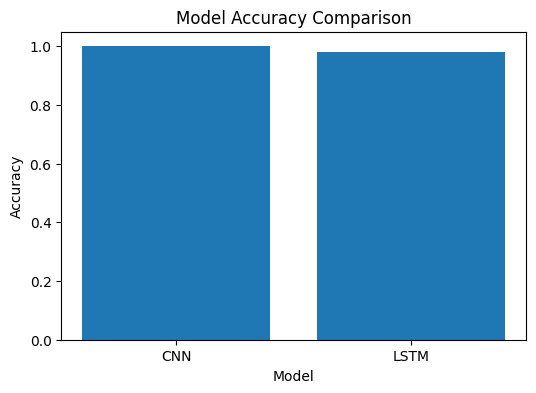

In [ ]:
cnn_accuracy = df[df['Model'] == 'CNN']['Accuracy'].values[0]
lstm_accuracy = df[df['Model'] == 'LSTM']['Accuracy'].values[0]

cnn_f1 = df[df['Model'] == 'CNN']['F1'].values[0]
lstm_f1 = df[df['Model'] == 'LSTM']['F1'].values[0]

cnn_recall = df[df['Model'] == 'CNN']['Recall'].values[0]
lstm_recall = df[df['Model'] == 'LSTM']['Recall'].values[0]

cnn_precision = df[df['Model'] == 'CNN']['Precision'].values[0]
lstm_precision = df[df['Model'] == 'LSTM']['Precision'].values[0]

# Generate accuracy bar plot
plt.figure(figsize=(6, 4))
plt.bar(['CNN', 'LSTM'], [cnn_accuracy, lstm_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


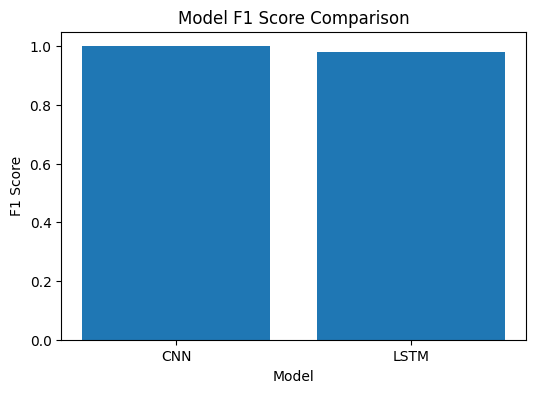

In [ ]:
# Generate F1 score bar plot
plt.figure(figsize=(6, 4))
plt.bar(['CNN', 'LSTM'], [cnn_f1, lstm_f1])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.show()

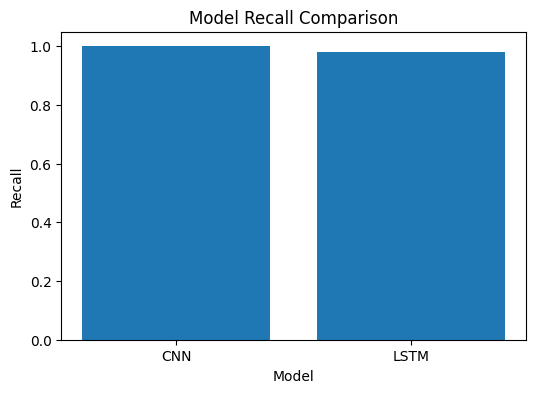

In [ ]:
# Generate recall bar plot
plt.figure(figsize=(6, 4))
plt.bar(['CNN', 'LSTM'], [cnn_recall, lstm_recall])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.show()

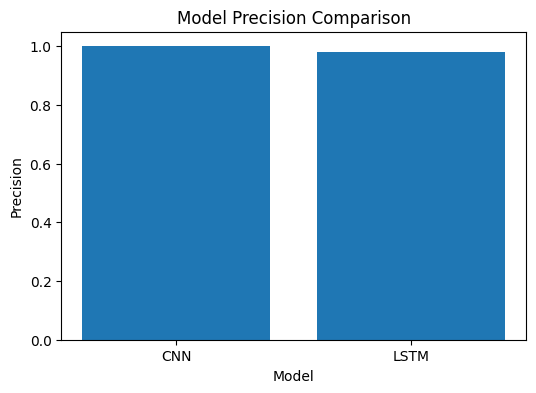

In [ ]:
# Generate precision bar plot
plt.figure(figsize=(6, 4))
plt.bar(['CNN', 'LSTM'], [cnn_precision, lstm_precision])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.show()